#### Import Statements required

In [ ]:
# Imports required to load the datasets from S3 Bucket
import os
import boto3
from boto3 import client
import botocore

# Additional imports required for the homework tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA

#### Raw Data Files Folder from S3 Bucket

In [ ]:
bucketname = "cmu-dshs-diabetes-data"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'Balance - Tablas (Parte 1 ) pacientes.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'Balance - Tablas (Parte 1 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'Balance - Tablas (Parte 2 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'Balance - Tablas (Parte 3 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'DataDictionary version 2.xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'I Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'II Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'III Datos CMU (ENC).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'IV Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'notasevolucionpsic.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key=u'psicologiasesion1.c

In [ ]:
# Using the client system in the boto3 
conn = client('s3')  
for key in conn.list_objects(Bucket=bucketname)['Contents']:
    print(key['Key'])

Balance - Tablas (Parte 1 ) pacientes.csv
Balance - Tablas (Parte 1 ).xlsx
Balance - Tablas (Parte 2 ).xlsx
Balance - Tablas (Parte 3 ).xlsx
DataDictionary version 2.xlsx
I Datos CMU (BAL).xlsx
II Datos CMU (BAL).xlsx
III Datos CMU (ENC).xlsx
IV Datos CMU (BAL).xlsx
notasevolucionpsic.csv
psicologiasesion1.csv


#### Previously refined files for Labels and Predictors

In [ ]:
bucketname = "046355044787-edu-sagemaker-instructor-us-east-1-course"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'49-734 Sp20 Designing Smart and Healthy Systems - full syllabus.pdf')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Appointment_Attending_Info.csv')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Group 1 HW1_task3.ipynb')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Group 2 HW1_task4 Predictor Variables (Demographics, Geography).ipynb')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Group 2 Homework_1.ipynb')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Group 3 HW 1.ipynb')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-course', key=u'Group 4 Task3.ipynb')
s3.ObjectSummary(bucket_name='046355044787-edu-sagemaker-instructor-us-east-1-

In [ ]:
# Using the client system in the boto3 
conn = client('s3')  
for key in conn.list_objects(Bucket=bucketname)['Contents']:
    print(key['Key'])

49-734 Sp20 Designing Smart and Healthy Systems - full syllabus.pdf
Appointment_Attending_Info.csv
Group 1 HW1_task3.ipynb
Group 2 HW1_task4 Predictor Variables (Demographics, Geography).ipynb
Group 2 Homework_1.ipynb
Group 3 HW 1.ipynb
Group 4 Task3.ipynb
Group 4 Task4.ipynb
Group 5 HW1.ipynb
List of hypotheses.pdf
all_service.csv
attend_all_buy.csv
attend_single_buy.csv
buy_clinics.csv
cv_complains.csv
frontdesk_complains.csv
geography.csv
history.csv
history_hospital.csv
lab_findings_df.csv
ndiet.csv
neval.csv
ninicio.csv
nplan.csv
nret.csv
nutrition_complains.csv
overall_complains.csv
patient_demographics.csv
physical_examination_df.csv
psicol_features.csv
single_service.csv
subscription.csv
survival_aggregate.csv


#### Read and describe the data

In [ ]:
# Function to read the data from csv file
def read_data_from_csv(filename,bucketname):
    dataframe = pd.read_csv('s3://{}/{}'.format(bucketname, filename), encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to read the data from excel sheet
def read_data_from_excel(filename,sheetname,bucketname):
    dataframe = pd.read_excel('s3://{}/{}'.format(bucketname, filename), sheetname, encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to display basic data info
def display_basic_data(dataframe):
    #Get the first 5 rows of the CSV
    display(dataframe.head(5))
    dataframe.info()

 <b> Appointment_attending_info </b>

In [ ]:
# Read the Appointment_attending_info file from s3
bucketname = "046355044787-edu-sagemaker-instructor-us-east-1-course"
filename = 'Appointment_Attending_Info.csv'
appoint_df = read_data_from_csv(filename,bucketname)

In [ ]:
# Display basic data
display_basic_data(appoint_df)

,IdPaciente,year,cnt_skip,cnt_cancel,cnt_reschedule,cnt_ontime
0,0,2015,2333,18,26,246
1,0,2014,340,12,13,302
2,0,2013,80,3,6,111
3,0,2016,12411,47,27,5419
4,1,2016,2,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18401 entries, 0 to 18400
Data columns (total 6 columns):
IdPaciente        18401 non-null int64
year              18401 non-null int64
cnt_skip          18401 non-null int64
cnt_cancel        18401 non-null int64
cnt_reschedule    18401 non-null int64
cnt_ontime        18401 non-null int64
dtypes: int64(6)
memory usage: 862.6 KB


Since the above data is only for years we need to extract the same again. Downloading the Notebook from Team 1 for more insights

In [ ]:
try:
    s3.Bucket(bucketname).download_file('Group 1 HW1_task3.ipynb', 'Group 1 HW1_task3.ipyn')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

Read data from the Balance - Tablas (Parte 1 ).xlsx

In [ ]:
bucketname = "cmu-dshs-diabetes-data"
filename = 'Balance - Tablas (Parte 1 ).xlsx'
sheetname = 'agenda'
balance_part1_df = read_data_from_excel(filename, sheetname ,bucketname)

In [ ]:
# Display basic data
display_basic_data(balance_part1_df)

,IdAgenda,IdPaciente,Area,Fecha,Hora,FechaAlta,Asistencia,Razon,IdConsultorio,IdEstatusCita,ComoSeEnteroCitaAg
0,2,497.0,TODOS,2013-01-02 00:00:00,08:30:29,0000-00-00,FALTO,1ER. SEG. 3 MESES,1,AGENDADA,NaN
1,3,302.0,EXPRESS O MONITOREO,2013-01-02 00:00:00,08:30:29,0000-00-00,FALTO,MONITOREO,1,AGENDADA,NaN
2,4,522.0,TODOS,2013-01-02 00:00:00,09:00:43,0000-00-00,FALTO,1ER. SEG. 3 MESES,1,AGENDADA,NaN
3,5,492.0,TODOS,2013-01-02 00:00:00,10:00:00,0000-00-00,CAMBIO DE CITA,INICIO DE PAQUETE,1,AGENDADA,NaN
4,6,521.0,TODOS,2013-01-03 00:00:00,07:30:00,0000-00-00,FALTO,1ER. SEG. 3 MESES,1,AGENDADA,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150308 entries, 0 to 150307
Data columns (total 11 columns):
IdAgenda              150308 non-null int64
IdPaciente            144067 non-null float64
Area                  150228 non-null object
Fecha                 150308 non-null object
Hora                  150308 non-null object
FechaAlta             150308 non-null object
Asistencia            141201 non-null object
Razon                 131011 non-null object
IdConsultorio         150308 non-null int64
IdEstatusCita         150306 non-null object
ComoSeEnteroCitaAg    5251 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.6+ MB


In [ ]:
balance_part1_df = balance_part1_df[balance_part1_df['IdPaciente'].notna()]
balance_part1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144067 entries, 0 to 150307
Data columns (total 11 columns):
IdAgenda              144067 non-null int64
IdPaciente            144067 non-null float64
Area                  144061 non-null object
Fecha                 144067 non-null object
Hora                  144067 non-null object
FechaAlta             144067 non-null object
Asistencia            140775 non-null object
Razon                 130583 non-null object
IdConsultorio         144067 non-null int64
IdEstatusCita         144065 non-null object
ComoSeEnteroCitaAg    5250 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 13.2+ MB


In [ ]:
cancel_appoint_df = balance_part1_df[['IdPaciente', 'Fecha', 'Asistencia']].copy()
cancel_appoint_df = cancel_appoint_df[(cancel_appoint_df['Asistencia'] == 'ASISTIO')]
cancel_appoint_df ['Eng_level4'] = 4
cancel_appoint_df['Year'], cancel_appoint_df['Month'] = cancel_appoint_df['Fecha'].dt.year, cancel_appoint_df['Fecha'].dt.month

cancel_appoint_df = cancel_appoint_df.drop(columns=['Asistencia','Fecha'])
cancel_appoint_df = cancel_appoint_df.drop_duplicates()
cancel_appoint_df.head()

,IdPaciente,Eng_level4,Year,Month
6,525.0,4,2013,1
8,220.0,4,2013,1
9,347.0,4,2013,1
10,476.0,4,2013,1
12,701.0,4,2013,1


In [ ]:
skip_appoint_df = balance_part1_df[['IdPaciente', 'Fecha', 'Asistencia']].copy()
skip_appoint_df = skip_appoint_df[skip_appoint_df['Asistencia'] == 'FALTO']
skip_appoint_df ['Eng_level3'] = 3
skip_appoint_df['Year'], skip_appoint_df['Month'] = skip_appoint_df['Fecha'].dt.year, skip_appoint_df['Fecha'].dt.month

skip_appoint_df = skip_appoint_df.drop(columns=['Asistencia','Fecha'])
skip_appoint_df = skip_appoint_df.drop_duplicates()
skip_appoint_df.head()

,IdPaciente,Eng_level3,Year,Month
0,497.0,3,2013,1
1,302.0,3,2013,1
2,522.0,3,2013,1
4,521.0,3,2013,1
7,647.0,3,2013,1


In [ ]:
resch_appoint_df = balance_part1_df[['IdPaciente', 'Fecha', 'Asistencia']].copy()
resch_appoint_df = resch_appoint_df[resch_appoint_df['Asistencia'] == 'CAMBIO DE CITA']
resch_appoint_df ['Eng_level6'] = 6
resch_appoint_df['Year'], resch_appoint_df['Month'] = resch_appoint_df['Fecha'].dt.year, resch_appoint_df['Fecha'].dt.month

resch_appoint_df = resch_appoint_df.drop(columns=['Asistencia','Fecha'])
resch_appoint_df = resch_appoint_df.drop_duplicates()
resch_appoint_df.head()

,IdPaciente,Eng_level6,Year,Month
3,492.0,6,2013,1
5,670.0,6,2013,1
11,394.0,6,2013,1
16,462.0,6,2013,1
17,273.0,6,2013,1


In [ ]:
single_service_df = balance_part1_df[['IdPaciente', 'Area', 'Fecha', 'Asistencia']].copy()
single_service_df =single_service_df[(single_service_df['Asistencia'] == 'ASISTIO')&(single_service_df['Area'] != 'TODOS')]
single_service_df ['Eng_level8'] = 8
single_service_df['Year'], single_service_df['Month'] = single_service_df['Fecha'].dt.year, single_service_df['Fecha'].dt.month

single_service_df = single_service_df.drop(columns=['Asistencia','Area','Fecha'])
single_service_df = single_service_df.drop_duplicates()
single_service_df.head()

,IdPaciente,Eng_level8,Year,Month
8,220.0,8,2013,1
13,233.0,8,2013,1
21,619.0,8,2013,1
26,378.0,8,2013,1
27,666.0,8,2013,1


In [ ]:
all_service_df = balance_part1_df[['IdPaciente', 'Area', 'Fecha', 'Asistencia']].copy()
all_service_df =all_service_df[(all_service_df['Asistencia'] == 'ASISTIO')&(all_service_df['Area'] == 'TODOS')]
all_service_df ['Eng_level10'] = 10
all_service_df['Year'], all_service_df['Month'] = all_service_df['Fecha'].dt.year, all_service_df['Fecha'].dt.month

all_service_df = all_service_df.drop(columns=['Asistencia','Area','Fecha'])
all_service_df = all_service_df.drop_duplicates()
all_service_df.head()

,IdPaciente,Eng_level10,Year,Month
6,525.0,10,2013,1
9,347.0,10,2013,1
10,476.0,10,2013,1
12,701.0,10,2013,1
15,690.0,10,2013,1


In [ ]:
# Find all the sheets that are available in the II Datos Excel Sheet
filename = 'III Datos CMU (ENC).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

[u'encuestas_servicios', u'config_calificaciones']

In [ ]:
bucketname = "cmu-dshs-diabetes-data"
filename = 'III Datos CMU (ENC).xlsx'
sheetname = 'encuestas_servicios'
complains_data_df = read_data_from_excel(filename, sheetname ,bucketname)

In [ ]:
# Display basic data
display_basic_data(complains_data_df)

,IdEncuestaServicio,IdEncuesta,IdConsultorio,IdPaciente,atendioRecepcion,calificaRecepcion,atendioCV,calificaCV,atendioNutricion,calificaNutricion,...,Felicitacion,anonima,calificaRecomendacion,Fecha,Hora,usuario_encuesta,atendioVentas,calificaVentas,NoQuisoContestar,sienteMejoria
0,2,ESS,5,5942,d383b71f075caa4670e99d83e46e26d6,4,2c2053d7b924a03b09648a1dda112d03,4,6a67fd053d630bb6c925f1d74184aa02,4,...,NaN,1,4,2016-05-19,12:04:40,13ead3f9c768cbc2afd3fe5bf69f32df,NaN,NaN,0,NaN
1,3,ESS,5,10570,13ead3f9c768cbc2afd3fe5bf69f32df,3,2c2053d7b924a03b09648a1dda112d03,3,6a67fd053d630bb6c925f1d74184aa02,3,...,NaN,0,1,2016-05-19,12:09:24,13ead3f9c768cbc2afd3fe5bf69f32df,NaN,NaN,0,NaN
2,4,ESS,5,5735,d383b71f075caa4670e99d83e46e26d6,4,2c2053d7b924a03b09648a1dda112d03,4,6a67fd053d630bb6c925f1d74184aa02,4,...,A TODO EL PERSONAL QUE ME HA ATENDIDO Y ME AGR...,0,4,2016-05-19,12:44:46,13ead3f9c768cbc2afd3fe5bf69f32df,NaN,NaN,0,NaN
3,5,ESS,5,10225,13ead3f9c768cbc2afd3fe5bf69f32df,4,2c2053d7b924a03b09648a1dda112d03,4,6a67fd053d630bb6c925f1d74184aa02,4,...,NaN,0,4,2016-05-19,13:02:10,13ead3f9c768cbc2afd3fe5bf69f32df,NaN,NaN,0,NaN
4,6,ESS,5,10485,13ead3f9c768cbc2afd3fe5bf69f32df,4,fc7ecc74ca51c9bccacaf932814b4b3d,4,6a67fd053d630bb6c925f1d74184aa02,4,...,NaN,0,4,2016-05-19,14:53:29,13ead3f9c768cbc2afd3fe5bf69f32df,NaN,NaN,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 27 columns):
IdEncuestaServicio            4565 non-null int64
IdEncuesta                    4565 non-null object
IdConsultorio                 4565 non-null int64
IdPaciente                    4565 non-null int64
atendioRecepcion              4565 non-null object
calificaRecepcion             4565 non-null int64
atendioCV                     4565 non-null object
calificaCV                    4565 non-null int64
atendioNutricion              4565 non-null object
calificaNutricion             4565 non-null int64
atendioPsicologia             4565 non-null object
calificaPsicologia            4565 non-null int64
atendioMedico                 4565 non-null object
calificaMedico                4565 non-null int64
calificaInstalacionClinica    4565 non-null int64
Comentario                    578 non-null object
Sugerencia                    1013 non-null object
Felicitacion                  640 no

<u> Assumption:</u>
Since we were unable to find a field that could help us understand the complains section we decided that the closest suggestive measure that we could think of as a part of the survey was the average of all the rates provided by the patients

So in case we have any average rating as 2.5 we can consider this as a complain from patients

In [ ]:
complains_data_df['Average_rating'] = (complains_data_df['calificaRecepcion'] + complains_data_df['calificaNutricion'] +
                                       complains_data_df['calificaCV'] + complains_data_df['calificaPsicologia'] +
                                       complains_data_df['calificaMedico'] + complains_data_df['calificaInstalacionClinica'] +
                                       complains_data_df['calificaRecomendacion']) / 7
complains_data_df['Average_rating'].unique()

array([3.28571429, 2.71428571, 4.        , 3.42857143, 3.71428571,
       3.85714286, 2.85714286, 2.42857143, 3.        , 3.57142857,
       1.28571429, 3.14285714, 2.57142857, 0.        , 1.14285714,
       2.28571429, 1.        , 2.14285714, 1.85714286, 2.        ,
       0.85714286, 1.71428571])

In [ ]:
complains_df = complains_data_df[['IdPaciente', 'Fecha', 'Average_rating']].copy()
complains_df = complains_df[complains_df['Average_rating'] < 2.5]
complains_df ['Eng_level5'] = 5
complains_df['Year'], complains_df['Month'] = complains_df['Fecha'].dt.year, complains_df['Fecha'].dt.month

complains_df = complains_df.drop(columns=['Average_rating','Fecha'])
complains_df = complains_df.drop_duplicates()
complains_df.head()

,IdPaciente,Eng_level5,Year,Month
9,7579,5,2016,5
15,10418,5,2016,5
63,0,5,2016,6
97,8501,5,2016,6
185,10392,5,2016,6


In [ ]:
bucketname = "cmu-dshs-diabetes-data"
filename = 'IV Datos CMU (BAL).xlsx'
sheetname = 'cm_tickets'
buys_clinic_df = read_data_from_excel(filename, sheetname ,bucketname)

In [ ]:
# Display basic data
display_basic_data(buys_clinic_df)

,IdPaciente,Fecha,AbonoMembresiaInscripcion,CompraFarmacia,CompraTienda
0,3299,2014-07-17,1,0,0
1,3301,2014-07-17,1,0,0
2,3311,2014-07-18,1,0,0
3,3311,2014-07-19,1,0,0
4,3321,2014-07-19,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77155 entries, 0 to 77154
Data columns (total 5 columns):
IdPaciente                   77155 non-null int64
Fecha                        77155 non-null datetime64[ns]
AbonoMembresiaInscripcion    77155 non-null int64
CompraFarmacia               77155 non-null int64
CompraTienda                 77155 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.9 MB


In [ ]:
buys_df = buys_clinic_df[['IdPaciente', 'Fecha', 'CompraFarmacia', 'CompraTienda']].copy()
buys_df = buys_df[(buys_df['CompraFarmacia']==1)|(buys_df['CompraTienda']==1)]
buys_df ['Eng_level7'] = 7
buys_df['Year'], buys_df['Month'] = buys_df['Fecha'].dt.year, buys_df['Fecha'].dt.month

buys_df = buys_df.drop(columns=['CompraFarmacia', 'CompraTienda', 'Fecha'])
buys_df = buys_df.drop_duplicates()
buys_df.head()

,IdPaciente,Eng_level7,Year,Month
12,3376,7,2014,7
32,3522,7,2014,8
33,3487,7,2014,8
34,3491,7,2014,8
35,3135,7,2014,8


In [ ]:
#Attends Single Service Appointments and Buys from Clinic: Used join "inner", since A AND B
buys_temp_df = buys_clinic_df[['IdPaciente', 'Fecha', 'CompraFarmacia', 'CompraTienda']].copy()
buys_temp_df = buys_temp_df[(buys_temp_df['CompraFarmacia']==1)|(buys_temp_df['CompraTienda']==1)]
buys_temp_df['Year'], buys_temp_df['Month'] = buys_temp_df['Fecha'].dt.year, buys_temp_df['Fecha'].dt.month

single_temp_service_df = balance_part1_df[['IdPaciente', 'Area', 'Fecha', 'Asistencia']].copy()
single_temp_service_df =single_temp_service_df[(single_temp_service_df['Asistencia'] == 'ASISTIO')&(single_temp_service_df['Area'] != 'TODOS')]
single_temp_service_df['Year'], single_temp_service_df['Month'] = single_temp_service_df['Fecha'].dt.year, single_temp_service_df['Fecha'].dt.month

attend_single_buy_df = pd.merge(left=single_temp_service_df, right=buys_temp_df, how ='inner', left_on=['Month', 'Year', 'IdPaciente'], right_on=['Month', 'Year', 'IdPaciente'])
attend_single_buy_df.head(10)

,IdPaciente,Area,Fecha_x,Asistencia,Year,Month,Fecha_y,CompraFarmacia,CompraTienda
0,3901.0,NUTRICIÓN,2014-11-12 00:00:00,ASISTIO,2014,11,2014-11-07,1,0
1,3901.0,NUTRICIÓN,2014-11-12 00:00:00,ASISTIO,2014,11,2014-11-26,1,0
2,4267.0,NUTRICIÓN,2014-12-09 00:00:00,ASISTIO,2014,12,2014-12-23,1,0
3,4267.0,EXPRESS O MONITOREO,2014-12-23 00:00:00,ASISTIO,2014,12,2014-12-23,1,0
4,3990.0,PSICOLOGÍA,2014-12-10 00:00:00,ASISTIO,2014,12,2014-12-22,0,1
5,3990.0,EXPRESS O MONITOREO,2014-12-22 00:00:00,ASISTIO,2014,12,2014-12-22,0,1
6,1796.0,NUTRICIÓN,2014-12-10 00:00:00,ASISTIO,2014,12,2014-12-26,1,0
7,4018.0,PSICOLOGÍA,2014-12-11 00:00:00,ASISTIO,2014,12,2014-12-30,0,1
8,4018.0,PSICOLOGÍA,2014-12-30 00:00:00,ASISTIO,2014,12,2014-12-30,0,1
9,4465.0,EXPRESS O MONITOREO,2014-12-11 00:00:00,ASISTIO,2014,12,2014-12-22,1,0


In [ ]:
attend_single_buy_df ['Eng_level9'] = 9
attend_single_buy_df = attend_single_buy_df.drop(columns=['CompraFarmacia', 'CompraTienda','Area', 'Fecha_x', 'Fecha_y', 'Asistencia'])
attend_single_buy_df = attend_single_buy_df.drop_duplicates()
attend_single_buy_df.head()

,IdPaciente,Year,Month,Eng_level9
0,3901.0,2014,11,9
2,4267.0,2014,12,9
4,3990.0,2014,12,9
6,1796.0,2014,12,9
7,4018.0,2014,12,9


In [ ]:
#Attends All Service Appointments and Buys from Clinic: Used join "inner", since A AND B
buys_temp_df = buys_clinic_df[['IdPaciente', 'Fecha', 'CompraFarmacia', 'CompraTienda']].copy()
buys_temp_df = buys_temp_df[(buys_temp_df['CompraFarmacia']==1)|(buys_temp_df['CompraTienda']==1)]
buys_temp_df['Year'], buys_temp_df['Month'] = buys_temp_df['Fecha'].dt.year, buys_temp_df['Fecha'].dt.month

all_temp_service_df = balance_part1_df[['IdPaciente', 'Area', 'Fecha', 'Asistencia']].copy()
all_temp_service_df =all_temp_service_df[(all_temp_service_df['Asistencia'] == 'ASISTIO')&(all_temp_service_df['Area'] == 'TODOS')]
all_temp_service_df['Year'], all_temp_service_df['Month'] = all_temp_service_df['Fecha'].dt.year, all_temp_service_df['Fecha'].dt.month

attend_all_buy_df = pd.merge(left=all_temp_service_df, right=buys_temp_df, how ='inner', left_on=['Month', 'Year', 'IdPaciente'], right_on=['Month', 'Year', 'IdPaciente'])
attend_all_buy_df.head(10)

,IdPaciente,Area,Fecha_x,Asistencia,Year,Month,Fecha_y,CompraFarmacia,CompraTienda
0,2659.0,TODOS,2014-10-08 00:00:00,ASISTIO,2014,10,2014-10-08,0,1
1,4242.0,TODOS,2014-11-06 00:00:00,ASISTIO,2014,11,2014-11-06,1,0
2,9.0,TODOS,2014-12-02 00:00:00,ASISTIO,2014,12,2014-12-20,0,1
3,1796.0,TODOS,2014-12-03 00:00:00,ASISTIO,2014,12,2014-12-26,1,0
4,40.0,TODOS,2014-12-03 00:00:00,ASISTIO,2014,12,2014-12-26,1,1
5,3633.0,TODOS,2014-12-04 00:00:00,ASISTIO,2014,12,2014-12-19,0,1
6,1909.0,TODOS,2014-12-06 00:00:00,ASISTIO,2014,12,2014-12-27,0,1
7,3719.0,TODOS,2014-12-08 00:00:00,ASISTIO,2014,12,2014-12-20,1,1
8,3041.0,TODOS,2014-12-08 00:00:00,ASISTIO,2014,12,2014-12-19,1,0
9,3110.0,TODOS,2014-12-09 00:00:00,ASISTIO,2014,12,2014-12-10,0,1


In [ ]:
attend_all_buy_df ['Eng_level11'] = 11
attend_all_buy_df = attend_all_buy_df.drop(columns=['CompraFarmacia', 'CompraTienda','Area', 'Fecha_x', 'Fecha_y', 'Asistencia'])
attend_all_buy_df = attend_all_buy_df.drop_duplicates()
attend_all_buy_df.head()

,IdPaciente,Year,Month,Eng_level11
0,2659.0,2014,10,11
1,4242.0,2014,11,11
2,9.0,2014,12,11
3,1796.0,2014,12,11
4,40.0,2014,12,11


In [ ]:
buy_renew_mem_df = buys_clinic_df[['IdPaciente', 'Fecha', 'AbonoMembresiaInscripcion']].copy()
buy_renew_mem_df = buy_renew_mem_df[(buy_renew_mem_df['AbonoMembresiaInscripcion']==1)]
buy_renew_mem_df ['Eng_level12'] = 12
buy_renew_mem_df['Year'], buy_renew_mem_df['Month'] = buy_renew_mem_df['Fecha'].dt.year, buy_renew_mem_df['Fecha'].dt.month

buy_renew_mem_df = buy_renew_mem_df.drop(columns=['AbonoMembresiaInscripcion','Fecha'])
buy_renew_mem_df = buy_renew_mem_df.drop_duplicates()

buy_renew_mem_df.head()

,IdPaciente,Eng_level12,Year,Month
0,3299,12,2014,7
1,3301,12,2014,7
2,3311,12,2014,7
4,3321,12,2014,7
5,3331,12,2014,7


In [ ]:
def merge_patdata_ondat(src,des):
    return pd.merge(left=src, right=des, how ='outer', left_on=['Month', 'Year', 'IdPaciente'], right_on=['Month', 'Year', 'IdPaciente'])

In [ ]:
final_eng_level_df = merge_patdata_ondat(buy_renew_mem_df,skip_appoint_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,cancel_appoint_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,complains_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,resch_appoint_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,buys_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,single_service_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,attend_single_buy_df)
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,all_service_df) 
final_eng_level_df = merge_patdata_ondat(final_eng_level_df,attend_all_buy_df)
final_eng_level_df.info()
final_eng_level_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86106 entries, 0 to 86105
Data columns (total 13 columns):
IdPaciente     86106 non-null int64
Eng_level12    30859 non-null float64
Year           86106 non-null int64
Month          86106 non-null int64
Eng_level3     32098 non-null float64
Eng_level4     56233 non-null float64
Eng_level5     307 non-null float64
Eng_level6     4374 non-null float64
Eng_level7     26503 non-null float64
Eng_level8     33398 non-null float64
Eng_level9     12412 non-null float64
Eng_level10    27940 non-null float64
Eng_level11    11426 non-null float64
dtypes: float64(10), int64(3)
memory usage: 9.2 MB


,IdPaciente,Eng_level12,Year,Month,Eng_level3,Eng_level4,Eng_level5,Eng_level6,Eng_level7,Eng_level8,Eng_level9,Eng_level10,Eng_level11
0,3299,12.0,2014,7,NaN,4.0,NaN,6.0,NaN,NaN,NaN,10.0,NaN
1,3301,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN
2,3311,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN
3,3321,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN
4,3331,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN


In [ ]:
final_eng_level_df['Avg_Eng_level'] = final_eng_level_df[['Eng_level3',
                                                         'Eng_level4','Eng_level5',
                                                         'Eng_level6','Eng_level7',
                                                         'Eng_level8','Eng_level9',
                                                         'Eng_level10','Eng_level11',
                                                         'Eng_level12']].mean(axis=1)
final_eng_level_df.head()

,IdPaciente,Eng_level12,Year,Month,Eng_level3,Eng_level4,Eng_level5,Eng_level6,Eng_level7,Eng_level8,Eng_level9,Eng_level10,Eng_level11,Avg_Eng_level
0,3299,12.0,2014,7,NaN,4.0,NaN,6.0,NaN,NaN,NaN,10.0,NaN,8.000000
1,3301,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN,8.500000
2,3311,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,8.666667
3,3321,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN,8.500000
4,3331,12.0,2014,7,NaN,4.0,NaN,NaN,NaN,8.0,NaN,10.0,NaN,8.500000


In [ ]:
avg_eng_level_df = final_eng_level_df[['IdPaciente', 'Year', 'Month', 'Avg_Eng_level']]
avg_eng_level_df.head()

,IdPaciente,Year,Month,Avg_Eng_level
0,3299,2014,7,8.000000
1,3301,2014,7,8.500000
2,3311,2014,7,8.666667
3,3321,2014,7,8.500000
4,3331,2014,7,8.500000


#### Plotting average engagaemnet level distribution

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


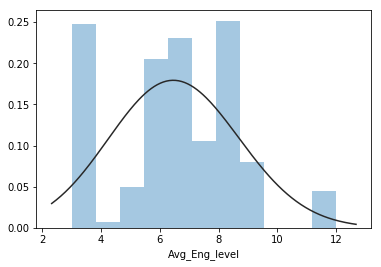

In [ ]:
sns.distplot(avg_eng_level_df['Avg_Eng_level'], kde=False, fit=stats.gamma, bins = 11)

In [ ]:
avg_eng_level_df = avg_eng_level_df.sort_values(by=['IdPaciente', 'Year', 'Month'])
avg_eng_level_df.info()
avg_eng_level_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86106 entries, 31502 to 55796
Data columns (total 4 columns):
IdPaciente       86106 non-null int64
Year             86106 non-null int64
Month            86106 non-null int64
Avg_Eng_level    86106 non-null float64
dtypes: float64(1), int64(3)
memory usage: 3.3 MB


,IdPaciente,Year,Month,Avg_Eng_level
31502,0,2013,6,6.2
31506,0,2013,7,6.2
31545,0,2013,8,6.2
31659,0,2013,9,6.2
31785,0,2013,10,5.0


#### Consolditing and outputting the outecome variables as desired

In [ ]:
month_list = [0] * 48
for i in range(48):
    month_list[i] = "M" + str(i+1)
col_list = ["IdPaciente"]
col_list += month_list

final_outcome = pd.DataFrame(columns = col_list)
final_outcome.columns

Index([u'IdPaciente', u'M1', u'M2', u'M3', u'M4', u'M5', u'M6', u'M7', u'M8',
       u'M9', u'M10', u'M11', u'M12', u'M13', u'M14', u'M15', u'M16', u'M17',
       u'M18', u'M19', u'M20', u'M21', u'M22', u'M23', u'M24', u'M25', u'M26',
       u'M27', u'M28', u'M29', u'M30', u'M31', u'M32', u'M33', u'M34', u'M35',
       u'M36', u'M37', u'M38', u'M39', u'M40', u'M41', u'M42', u'M43', u'M44',
       u'M45', u'M46', u'M47', u'M48'],
      dtype='object')

In [ ]:
def process_pat(df):
    """ 
    Creating a list of engagement levels as 2 for capturing default of no engagement i.e. level 2
    and capturing 4 years of data to having teh maximum size of the list as 48
    """
    list_val = [2] * 48
    index = 0 
    for i in range(df.shape[0]):
        if i==0:
            list_val[index] = df['Avg_Eng_level'].iloc[i]
            index += 1
        else: 
            diff_mon = ((df['Year'].iloc[i] - df['Year'].iloc[i-1])*12 + (df['Month'].iloc[i] - df['Month'].iloc[i-1]))
            index += (diff_mon - 1)
            list_val[index] = df['Avg_Eng_level'].iloc[i]
            index += 1
    pat_id = [df['IdPaciente'].iloc[i]]
    out_list = pat_id + list_val
    final_outcome.loc[len(final_outcome)] = out_list

In [ ]:
index = 0
for i in range(avg_eng_level_df.shape[0]-1):
    if avg_eng_level_df['IdPaciente'].iloc[i] == avg_eng_level_df['IdPaciente'].iloc[i+1]:
        continue
    else:
        if i==(avg_eng_level_df.shape[0]-1):
            pat_df = avg_eng_level_df[index:i+2].copy()
        else:
            pat_df = avg_eng_level_df[index:i+1].copy()
        process_pat(pat_df)
        index = i+1

In [ ]:
final_outcome = final_outcome.round(2)
final_outcome.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48
0,0.0,6.20,6.2,6.2,6.2,5.0,6.25,5.25,5.25,5.25,...,6.2,5.0,6.2,5.25,5.25,2.0,2.0,2.0,2.0,2.0
1,1.0,12.00,2.0,2.0,7.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
2,2.0,3.00,2.0,2.0,2.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
3,3.0,5.67,2.0,2.0,3.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
4,4.0,7.00,2.0,2.0,2.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0


In [ ]:
final_outcome.to_csv('outcome_var.csv')

#### K-Means Clustering

As we were unable to import the k-mediods library we have used the k-means instaed to help cluster the dataset

As mentioned we used k=4 and average_engagement level calculated across months to cluster the data

##### Inferences:

Cluster 0: The engagemnet levels are high for month 1 and then gradually they decrease with peaks formed almost every quaterly till month 12 and then no engagemnet at all

Cluster 1: Good engagement in the intial 5 - 6 months then gradual decresse/ no engagement at all

Cluster 2: Steady average engagement levels throughout the tenure

Cluster 3: There is only good engagemnet level in first 2-4 months and then gradual decresse/ no engagement at all

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(final_outcome.loc[:,'M1':'M48'])

final_outcome.head()

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M39,M40,M41,M42,M43,M44,M45,M46,M47,M48
0,0.0,6.20,6.2,6.2,6.2,5.0,6.25,5.25,5.25,5.25,...,6.2,5.0,6.2,5.25,5.25,2.0,2.0,2.0,2.0,2.0
1,1.0,12.00,2.0,2.0,7.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
2,2.0,3.00,2.0,2.0,2.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
3,3.0,5.67,2.0,2.0,3.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0
4,4.0,7.00,2.0,2.0,2.0,2.0,2.00,2.00,2.00,2.00,...,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0


In [ ]:
from sklearn import metrics

cluster_list = [2,3,4,5,6,7,8,9]
silhoutte_list = [0]* 8
for i in range(2,10):
    km = KMeans(
    n_clusters=i, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    y = km.fit_predict(final_outcome.loc[:,'M1':'M48'])
    silhoutte_list[i-2] = metrics.silhouette_score(final_outcome.loc[:,'M1':'M48'], y)
    print("For "+ str(i)+" Clusters Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(final_outcome.loc[:,'M1':'M48'], y))

For 2 Clusters Silhouette Coefficient: 0.382
For 3 Clusters Silhouette Coefficient: 0.324
For 4 Clusters Silhouette Coefficient: 0.262
For 5 Clusters Silhouette Coefficient: 0.225
For 6 Clusters Silhouette Coefficient: 0.217
For 7 Clusters Silhouette Coefficient: 0.222
For 8 Clusters Silhouette Coefficient: 0.234
For 9 Clusters Silhouette Coefficient: 0.240


We used the silhoutte metrics to assess if the no. of clusters gave desirable results.

Above are the findings which says that as per this data k=4 does give results however most of teh data is not correctly classified leading to some values not in adequate cluster

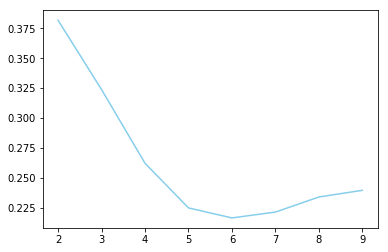

In [ ]:
k_means_plot = pd.DataFrame({'Cluster': cluster_list , 'Silhoutte metric score': silhoutte_list})
plt.plot( 'Cluster', 'Silhoutte metric score', data=k_means_plot, color='skyblue')
plt.show()

In [ ]:
output_data = final_outcome.copy()
output_data['Y'] = y_km

output_data['Y'].unique()

array([2, 3, 1, 0])

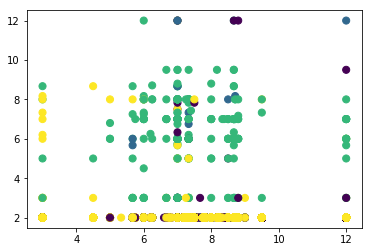

In [ ]:
plt.scatter(output_data.M1, output_data.M24, s=50, c=output_data.Y)

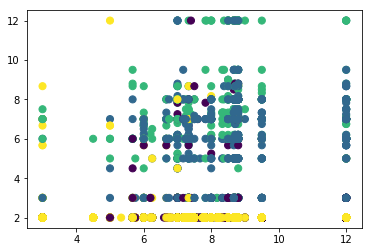

In [ ]:
plt.scatter(output_data.M1, output_data.M12, s=50, c=output_data.Y)

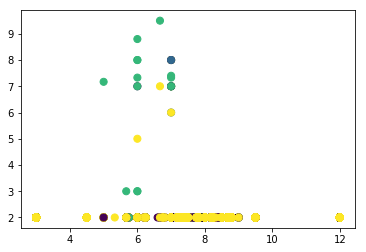

In [ ]:
plt.scatter(output_data.M1, output_data.M48, s=50, c=output_data.Y)

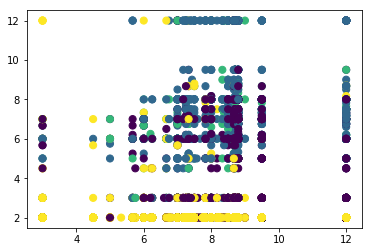

In [ ]:
plt.scatter(output_data.M1, output_data.M6, s=50, c=output_data.Y)

In [ ]:
pca_output_data = PCA(n_components=2).fit_transform(output_data)
result_data = pd.DataFrame(pca_output_data,columns=['pca1','pca2'])

#### Distribution of clusters

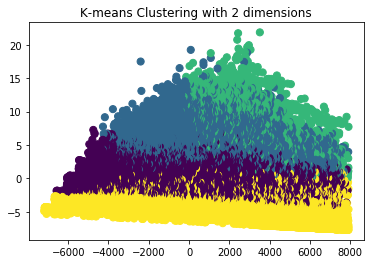

In [ ]:
#sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=result_data)
plt.scatter(result_data.pca1, result_data.pca2, s=50, c=output_data.Y)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
output_data[output_data['Y']==0].head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M40,M41,M42,M43,M44,M45,M46,M47,M48,Y
30,44.0,7.33,3.0,4.5,7.00,2.00,2.00,7.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
52,102.0,5.67,2.0,7.0,7.00,2.00,2.00,7.0,2.00,2.0,...,7.0,2.0,2.0,3.0,7.0,3.0,7.25,12.0,2.0,0
59,111.0,6.00,7.0,6.0,3.00,3.00,2.00,2.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
73,174.0,7.00,6.0,5.0,7.00,3.00,2.00,7.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
109,254.0,7.00,6.0,3.0,5.67,3.00,2.00,7.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
122,281.0,7.00,2.0,6.0,5.25,7.00,3.00,2.0,3.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
151,348.0,5.67,6.0,3.0,3.00,6.67,5.25,7.0,3.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
159,362.0,7.00,6.0,6.0,5.67,3.00,3.00,7.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
181,407.0,7.00,6.0,5.0,7.00,6.00,3.00,2.0,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0
188,430.0,6.00,7.0,2.0,6.00,7.00,2.00,6.0,7.33,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,0


In [ ]:
output_data[output_data['Y']==1].head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M40,M41,M42,M43,M44,M45,M46,M47,M48,Y
11,14.0,5.67,6.00,3.0,7.50,12.00,12.0,2.00,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
42,75.0,5.75,3.00,2.0,8.00,7.00,3.0,5.00,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
87,206.0,8.67,5.00,12.0,3.00,12.00,12.0,2.00,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
103,244.0,3.00,7.00,2.0,2.00,2.00,6.0,6.00,6.00,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
133,307.0,7.83,7.00,7.0,8.00,5.00,7.0,7.00,5.00,7.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
163,369.0,7.00,2.00,6.0,6.67,6.00,6.0,7.00,7.33,5.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
197,446.0,3.00,5.00,6.0,7.00,8.00,3.0,5.00,7.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
206,461.0,4.50,7.33,6.0,2.00,6.67,6.0,6.00,7.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
250,536.0,7.00,2.00,2.0,7.00,6.00,2.0,7.00,2.00,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
255,547.0,5.67,5.00,2.0,5.67,3.00,2.0,7.33,6.00,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [ ]:
output_data[output_data['Y']==2].head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M40,M41,M42,M43,M44,M45,M46,M47,M48,Y
0,0.0,6.20,6.2,6.20,6.20,5.0,6.25,5.25,5.25,5.25,...,5.00,6.2,5.25,5.25,2.00,2.00,2.00,2.0,2.00,2
6,6.0,7.00,2.0,2.00,7.00,2.0,2.00,7.00,6.00,2.00,...,8.67,8.0,8.00,8.67,6.00,6.00,7.00,2.0,2.00,2
8,9.0,6.67,6.0,2.00,2.00,6.0,2.00,7.00,2.00,2.00,...,8.00,2.0,2.00,2.00,7.00,2.00,2.00,3.0,2.00,2
12,15.0,7.00,6.0,6.00,5.67,2.0,2.00,2.00,2.00,7.00,...,7.00,12.0,8.00,8.80,8.00,7.33,8.00,7.0,7.33,2
17,28.0,7.00,6.0,2.00,7.00,2.0,2.00,6.67,3.00,3.00,...,5.00,5.0,5.00,5.00,7.00,8.80,2.00,2.0,2.00,2
25,37.0,6.00,7.0,2.00,3.00,7.0,2.00,2.00,7.00,2.00,...,2.00,2.0,7.00,3.00,7.00,3.00,8.50,2.0,3.00,2
26,40.0,6.00,3.0,7.00,2.00,2.0,7.33,2.00,2.00,5.67,...,8.00,7.0,7.00,3.00,2.00,7.00,12.00,3.0,7.33,2
49,96.0,7.00,6.0,6.00,7.00,2.0,2.00,7.00,6.00,2.00,...,2.00,8.0,2.00,2.00,7.83,2.00,2.00,8.8,2.00,2
50,97.0,6.00,6.0,7.33,6.67,6.0,2.00,7.00,6.00,6.00,...,8.00,3.0,6.00,8.80,8.00,8.00,8.67,8.0,8.00,2
72,172.0,6.00,7.0,3.00,7.00,2.0,2.00,6.67,6.00,6.00,...,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.0,2.00,2


In [ ]:
output_data[output_data['Y']==3].head(10)

,IdPaciente,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M40,M41,M42,M43,M44,M45,M46,M47,M48,Y
1,1.0,12.00,2.0,2.0,7.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
2,2.0,3.00,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
3,3.0,5.67,2.0,2.0,3.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
4,4.0,7.00,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
5,5.0,5.67,2.0,2.0,5.67,2.0,2.0,7.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
7,7.0,3.00,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
9,10.0,6.00,6.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
10,11.0,5.67,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
13,19.0,6.67,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
14,20.0,7.00,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
